In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import pyodbc
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

In [2]:
svr_name = 'KU1ICDDWV011.kunet.ae'
db_name_read = 'CACM'
db_name_write = 'CACMP'
u_name = 'cacm_user'
u_pass = 'Welcome#123'

In [3]:
eng_read = create_engine("mssql+pyodbc://"+u_name+":"+u_pass+"@"+svr_name+"/"+db_name_read+"?driver=ODBC+Driver+17+for+SQL+Server")
eng_write = create_engine("mssql+pyodbc://"+u_name+":"+u_pass+"@"+svr_name+"/"+db_name_write+"?driver=ODBC+Driver+17+for+SQL+Server")

In [4]:
query_emp_master = "SELECT * FROM dbo.KU_EmployeeDetails_VIEW"
df_emp_master = pd.read_sql(query_emp_master, eng_read)

In [5]:
emp = df_emp_master.copy()

In [6]:
df_emp = emp.loc[:,["EmpNo","EmployeeName","Position","Job","NatCat","Department","Division","College","Contract_End"]]

In [7]:
df_emp["Contract_End"] = pd.to_datetime(df_emp["Contract_End"])

In [8]:
grouped = df_emp.groupby("NatCat").size()

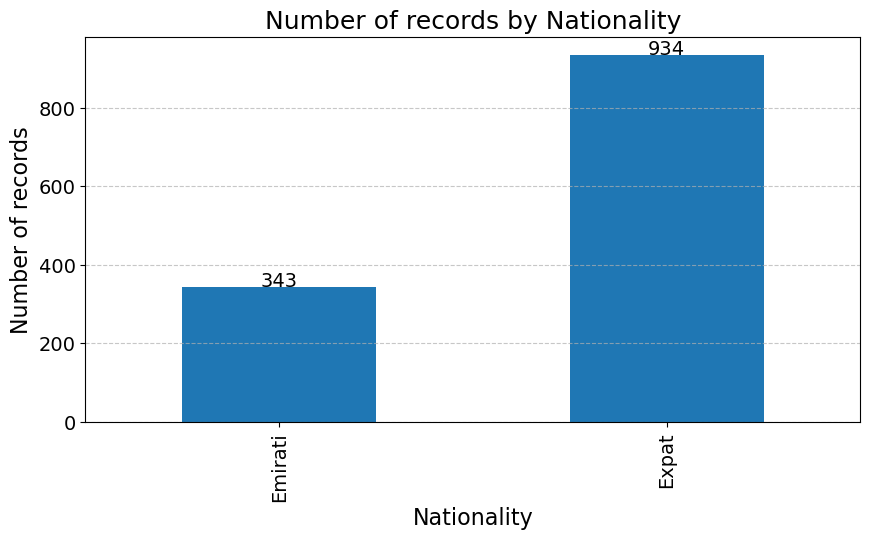

In [17]:
ax = grouped.plot(kind="bar",figsize=(10,5), color="#1f77b4")
ax.grid(axis="y",linestyle="--",alpha=0.7)
plt.rcParams.update({'font.size':14})
ax.set_title("Number of records by Nationality",fontsize=18)
ax.set_xlabel("Nationality",fontsize=16)
ax.set_ylabel("Number of records",fontsize=16)

for i, v in enumerate(grouped):
    ax.text(i, v+2,str(v),ha="center")
    
plt.show()